In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [2]:

# Load the dataset
df = pd.read_csv('/content/Acc_Classified_according_to_Type_of_Weather_Condition_2014_and_2016.csv')

# Extract relevant columns for fine/clear weather accidents in 2016
df = df[['State/ UT', 'Fine/Clear - Total Accidents - 2016']]


In [3]:
# Rename columns for simplicity
df.columns = ['State', 'Fine_Clear_Accidents']

# Drop rows with missing values
df = df.dropna()


In [4]:
# Prepare data for analysis
df['State_Index'] = range(len(df))  # Add an index to use as a feature
X = df[['State_Index']]  # Predictor (index as proxy for states)
y = df['Fine_Clear_Accidents']  # Target (number of accidents)


In [5]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Apply Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)



In [7]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")



Mean Squared Error (MSE): 1062373495.489311
Mean Absolute Error (MAE): 29837.627135189796
R^2 Score: -5.161888620909422


In [8]:
# Find the state with the highest accidents
highest_accident_state = df.loc[df['Fine_Clear_Accidents'].idxmax()]

print(f"State with the highest accidents: {highest_accident_state['State']}")
print(f"Number of accidents: {highest_accident_state['Fine_Clear_Accidents']}")


State with the highest accidents: Total
Number of accidents: 345568


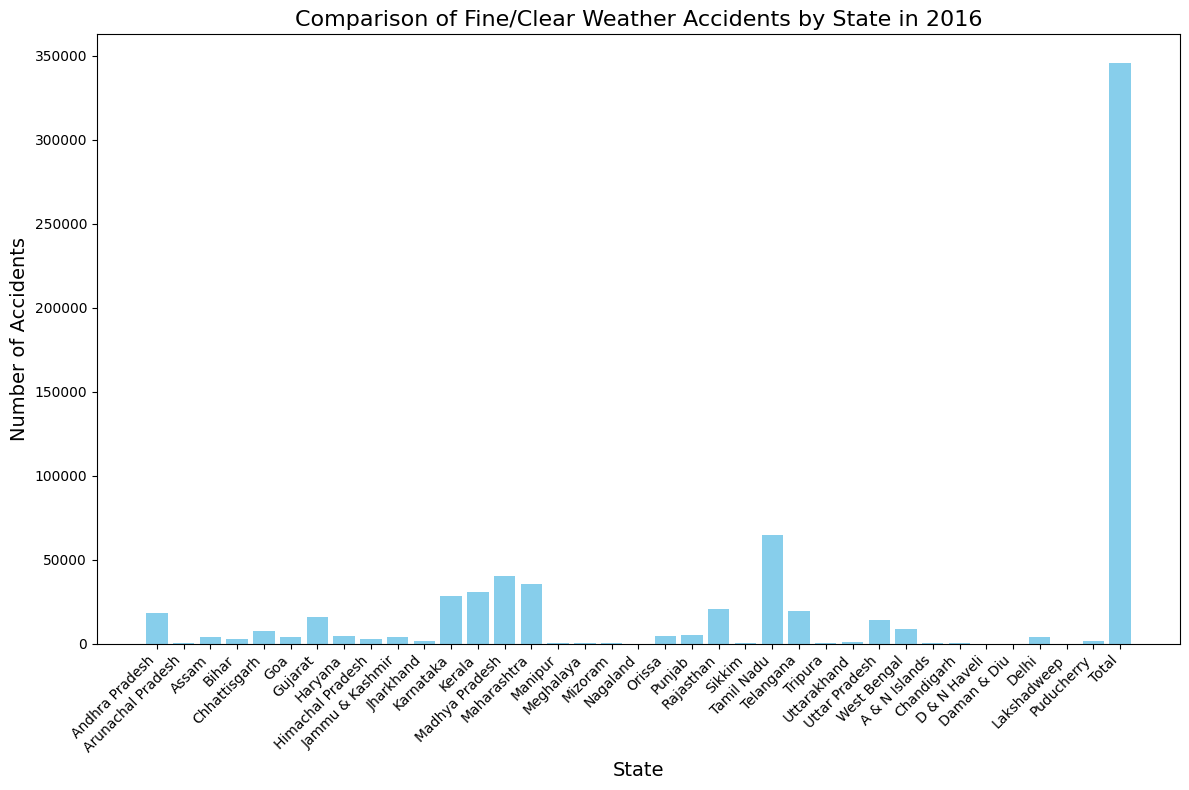

In [9]:
# Plot comparison of accidents by state
plt.figure(figsize=(12, 8))
plt.bar(df['State'], df['Fine_Clear_Accidents'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Comparison of Fine/Clear Weather Accidents by State in 2016', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.tight_layout()
plt.show()